<a href="https://colab.research.google.com/github/matyi101/MP2-Code/blob/main/mp2_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines --quiet
!pip install humanize --quiet
!pip install pyspark --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# path = "/content/drive/MyDrive/Colab Notebooks/dataset"
path = "/content/drive/My Drive/dataset/"

from google.colab import data_table
data_table.enable_dataframe_formatter()

import os

import pandas as pd
from lifelines import KaplanMeierFitter
from humanize import naturalsize
import matplotlib.ticker as mtick

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

%matplotlib inline

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 160
plt.rcParams["axes.grid"] = True

import pyspark
import pyspark.sql.functions as F
pyspark.__version__

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'3.3.1'

In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/dataset"
path = "/content/drive/My Drive/dataset/"
os.listdir(path)

['dataset=data_Q1_2020',
 'dataset=data_Q1_2021',
 'dataset=data_Q2_2020',
 'dataset=data_Q4_2021',
 'dataset=data_Q4_2020',
 'dataset=data_Q1_2022',
 'dataset=data_Q2_2021',
 'dataset=data_Q3_2020',
 'dataset=data_Q2_2022',
 'dataset=data_Q3_2021',
 'dataset=data_Q3_2022']

In [ ]:
!du -sh "/content/drive/My Drive/dataset/"

56G	/content/drive/My Drive/dataset/


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("DataFrame") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
%%time
df = spark.read.csv("/content/drive/My Drive/dataset/", header=True)
df.printSchema()         

root
 |-- date: string (nullable = true)
 |-- serial_number: string (nullable = true)
 |-- model: string (nullable = true)
 |-- capacity_bytes: string (nullable = true)
 |-- failure: string (nullable = true)
 |-- smart_1_normalized: string (nullable = true)
 |-- smart_1_raw: string (nullable = true)
 |-- smart_2_normalized: string (nullable = true)
 |-- smart_2_raw: string (nullable = true)
 |-- smart_3_normalized: string (nullable = true)
 |-- smart_3_raw: string (nullable = true)
 |-- smart_4_normalized: string (nullable = true)
 |-- smart_4_raw: string (nullable = true)
 |-- smart_5_normalized: string (nullable = true)
 |-- smart_5_raw: string (nullable = true)
 |-- smart_7_normalized: string (nullable = true)
 |-- smart_7_raw: string (nullable = true)
 |-- smart_8_normalized: string (nullable = true)
 |-- smart_8_raw: string (nullable = true)
 |-- smart_9_normalized: string (nullable = true)
 |-- smart_9_raw: string (nullable = true)
 |-- smart_10_normalized: string (nullable = tru

In [ ]:
df.show(10)

+----------+--------------+--------------------+--------------+-------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+---

In [ ]:
pd= df.limit(5).toPandas()
pd

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,dataset
0,2022-09-30,PL1331LAGDJ5GH,HGST HDS5C4040ALE630,4000787030016,0,100,0,134,101,139,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
1,2022-09-30,PL2331LAGLW5UJ,HGST HMS5C4040BLE640,4000787030016,0,100,0,133,104,127,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
2,2022-09-30,PL2331LAGM410J,HGST HMS5C4040BLE640,4000787030016,0,100,0,134,102,124,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
3,2022-09-30,PL2331LAGM5NTJ,HGST HMS5C4040BLE640,4000787030016,0,100,0,135,99,121,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
4,2022-09-30,PL2331LAGM5R4J,HGST HMS5C4040BLE640,4000787030016,0,100,0,135,99,123,...,None,None,None,None,None,None,None,None,None,data_Q3_2022


In [ ]:
df.limit(10).toPandas()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,dataset
0,2022-09-30,PL1331LAGDJ5GH,HGST HDS5C4040ALE630,4000787030016,0,100,0,134,101,139,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
1,2022-09-30,PL2331LAGLW5UJ,HGST HMS5C4040BLE640,4000787030016,0,100,0,133,104,127,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
2,2022-09-30,PL2331LAGM410J,HGST HMS5C4040BLE640,4000787030016,0,100,0,134,102,124,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
3,2022-09-30,PL2331LAGM5NTJ,HGST HMS5C4040BLE640,4000787030016,0,100,0,135,99,121,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
4,2022-09-30,PL2331LAGM5R4J,HGST HMS5C4040BLE640,4000787030016,0,100,0,135,99,123,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
5,2022-09-30,PL2331LAGM82LJ,HGST HMS5C4040BLE640,4000787030016,0,100,0,134,100,128,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
6,2022-09-30,PL2331LAGM9J9J,HGST HMS5C4040BLE640,4000787030016,0,100,0,134,100,128,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
7,2022-09-30,PL2331LAGM9Y6J,HGST HMS5C4040BLE640,4000787030016,0,100,0,134,102,125,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
8,2022-09-30,PL2331LAGMAPRJ,HGST HMS5C4040BLE640,4000787030016,0,100,0,134,103,126,...,None,None,None,None,None,None,None,None,None,data_Q3_2022
9,2022-09-30,PL2331LAGMDMLJ,HGST HMS5C4040BLE640,4000787030016,0,100,0,134,100,127,...,None,None,None,None,None,None,None,None,None,data_Q3_2022


In [ ]:
dff = df.select(
    F.col("date").astype("date"),
    F.trim(F.col("serial_number")).alias("serial_number").astype("string"),
    F.trim(F.col("model")).alias("model").astype("string"),
    F.col("capacity_bytes").astype("bigint"),
    F.col("failure").astype("int"),
    F.col("smart_9_raw").astype("bigint"),
    F.col("dataset").astype("string"),
)

In [ ]:
dff.limit(10).toPandas()

,date,serial_number,model,capacity_bytes,failure,smart_9_raw,dataset
0,2022-09-30,PL1331LAGDJ5GH,HGST HDS5C4040ALE630,4000787030016,0,46428,data_Q3_2022
1,2022-09-30,PL2331LAGLW5UJ,HGST HMS5C4040BLE640,4000787030016,0,72795,data_Q3_2022
2,2022-09-30,PL2331LAGM410J,HGST HMS5C4040BLE640,4000787030016,0,72792,data_Q3_2022
3,2022-09-30,PL2331LAGM5NTJ,HGST HMS5C4040BLE640,4000787030016,0,72796,data_Q3_2022
4,2022-09-30,PL2331LAGM5R4J,HGST HMS5C4040BLE640,4000787030016,0,72796,data_Q3_2022
5,2022-09-30,PL2331LAGM82LJ,HGST HMS5C4040BLE640,4000787030016,0,72786,data_Q3_2022
6,2022-09-30,PL2331LAGM9J9J,HGST HMS5C4040BLE640,4000787030016,0,72789,data_Q3_2022
7,2022-09-30,PL2331LAGM9Y6J,HGST HMS5C4040BLE640,4000787030016,0,72798,data_Q3_2022
8,2022-09-30,PL2331LAGMAPRJ,HGST HMS5C4040BLE640,4000787030016,0,72790,data_Q3_2022
9,2022-09-30,PL2331LAGMDMLJ,HGST HMS5C4040BLE640,4000787030016,0,72791,data_Q3_2022


In [ ]:
dfm = dff.withColumn(
    "manufacturer",
    F.when(F.col("model").like("ST%"), "Seagate")
    .when(F.col("model").like("Hitachi %"), "HGST/Hitachi")
    .when(F.col("model").like("HGST %"), "HGST/Hitachi")
    .when(F.col("model").like("% %"), F.split(F.col("model"), " ")[0])
    .otherwise("unknown"),
)

In [ ]:
dfm.limit(10).toPandas()

,date,serial_number,model,capacity_bytes,failure,smart_9_raw,dataset,manufacturer
0,2022-09-30,PL1331LAGDJ5GH,HGST HDS5C4040ALE630,4000787030016,0,46428,data_Q3_2022,HGST/Hitachi
1,2022-09-30,PL2331LAGLW5UJ,HGST HMS5C4040BLE640,4000787030016,0,72795,data_Q3_2022,HGST/Hitachi
2,2022-09-30,PL2331LAGM410J,HGST HMS5C4040BLE640,4000787030016,0,72792,data_Q3_2022,HGST/Hitachi
3,2022-09-30,PL2331LAGM5NTJ,HGST HMS5C4040BLE640,4000787030016,0,72796,data_Q3_2022,HGST/Hitachi
4,2022-09-30,PL2331LAGM5R4J,HGST HMS5C4040BLE640,4000787030016,0,72796,data_Q3_2022,HGST/Hitachi
5,2022-09-30,PL2331LAGM82LJ,HGST HMS5C4040BLE640,4000787030016,0,72786,data_Q3_2022,HGST/Hitachi
6,2022-09-30,PL2331LAGM9J9J,HGST HMS5C4040BLE640,4000787030016,0,72789,data_Q3_2022,HGST/Hitachi
7,2022-09-30,PL2331LAGM9Y6J,HGST HMS5C4040BLE640,4000787030016,0,72798,data_Q3_2022,HGST/Hitachi
8,2022-09-30,PL2331LAGMAPRJ,HGST HMS5C4040BLE640,4000787030016,0,72790,data_Q3_2022,HGST/Hitachi
9,2022-09-30,PL2331LAGMDMLJ,HGST HMS5C4040BLE640,4000787030016,0,72791,data_Q3_2022,HGST/Hitachi


In [ ]:
dfm.createOrReplaceTempView('drive_days')

In [ ]:
drive_spans = spark.sql("""
select
    manufacturer,
    model,
    serial_number,
    max(date) as retired_date,
    min(date) as launched_date,
    count(date) as observed_days,
    max(capacity_bytes) as capacity_bytes,
    min(case when failure=1 then date end) as failed_date,
    max(smart_9_raw) as max_hours,
    min(case when failure=1 then smart_9_raw end) as failed_hours,
    max(failure) as failure
from drive_days
group by manufacturer, model, serial_number
""").cache()

In [ ]:
%%time
drive_spans.count()

CPU times: user 10.1 ms, sys: 1.14 ms, total: 11.2 ms
Wall time: 2.65 s


285830

In [ ]:
drive_spans.write.mode('overwrite').parquet('drive_spans')

In [ ]:
!du -sh drive_spans

6.7M	drive_spans


In [ ]:
drive_spans.createOrReplaceTempView('drive_spans')

mfr_weeks = spark.sql("""
select
    date,
    manufacturer,
    count(distinct serial_number) as n_drives
from
(select explode(sequence(
    to_date('2020-01-01'),
    to_date('2022-09-30'),
    interval 1 week
    )) as date
) backbone
inner join drive_spans
  on backbone.date
      between drive_spans.launched_date
          and drive_spans.retired_date
group by date, manufacturer
""").cache()

In [ ]:
%%time
pd_mfr_weeks = mfr_weeks.toPandas().assign(
    date=lambda x: pd.to_datetime(x.date)
)

AttributeError: ignored

In [ ]:
pdcounts = pd_mfr_weeks.groupby("manufacturer").n_drives.max()

pdp = pd_mfr_weeks.pivot(
    index="date", columns="manufacturer", values="n_drives"
).loc[:, pdcounts > 30]



In [ ]:
pdp.head(25)

manufacturer,DELLBOSS,HGST/Hitachi,HP,Seagate,TOSHIBA,WDC,unknown
date,,,,,,,
2020-01-01,60.0,29067.0,NaN,90944.0,4609.0,275.0,NaN
2020-01-08,60.0,29075.0,NaN,91012.0,4599.0,274.0,NaN
2020-01-15,60.0,29083.0,NaN,91007.0,4596.0,274.0,NaN
2020-01-22,60.0,29090.0,NaN,91489.0,4593.0,274.0,NaN
2020-01-29,60.0,29095.0,NaN,92224.0,4587.0,274.0,NaN
2020-02-05,60.0,29100.0,NaN,92240.0,5786.0,274.0,NaN
2020-02-12,60.0,29104.0,NaN,92242.0,5780.0,273.0,NaN
2020-02-19,60.0,29106.0,NaN,92244.0,5778.0,272.0,NaN
2020-02-26,60.0,29108.0,NaN,92264.0,6976.0,272.0,NaN


In [ ]:
pdp.tail(25)

manufacturer,DELLBOSS,HGST/Hitachi,HP,Seagate,TOSHIBA,WDC,unknown
date,,,,,,,
2021-10-13,210.0,42670.0,34.0,99724.0,42553.0,9702.0,90.0
2021-10-20,210.0,42676.0,57.0,99602.0,43754.0,9702.0,90.0
2021-10-27,210.0,43875.0,81.0,99592.0,43808.0,9704.0,90.0
2021-11-03,210.0,43883.0,81.0,99582.0,43805.0,9704.0,90.0
2021-11-10,230.0,43889.0,78.0,100792.0,44122.0,9912.0,90.0
2021-11-17,230.0,43894.0,64.0,100785.0,44178.0,9925.0,93.0
2021-11-24,250.0,43903.0,47.0,100770.0,44186.0,10459.0,100.0
2021-12-01,250.0,43909.0,41.0,100758.0,44185.0,10463.0,106.0
2021-12-08,250.0,43915.0,35.0,100750.0,44184.0,10467.0,112.0


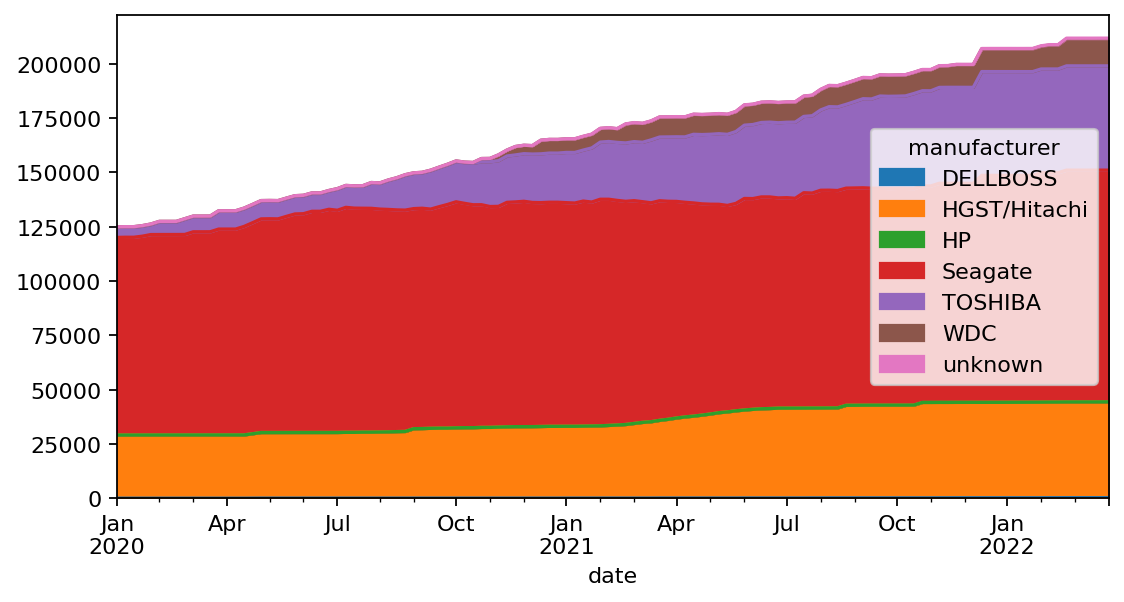

In [ ]:
pdp.plot.area()
plt.grid(False)

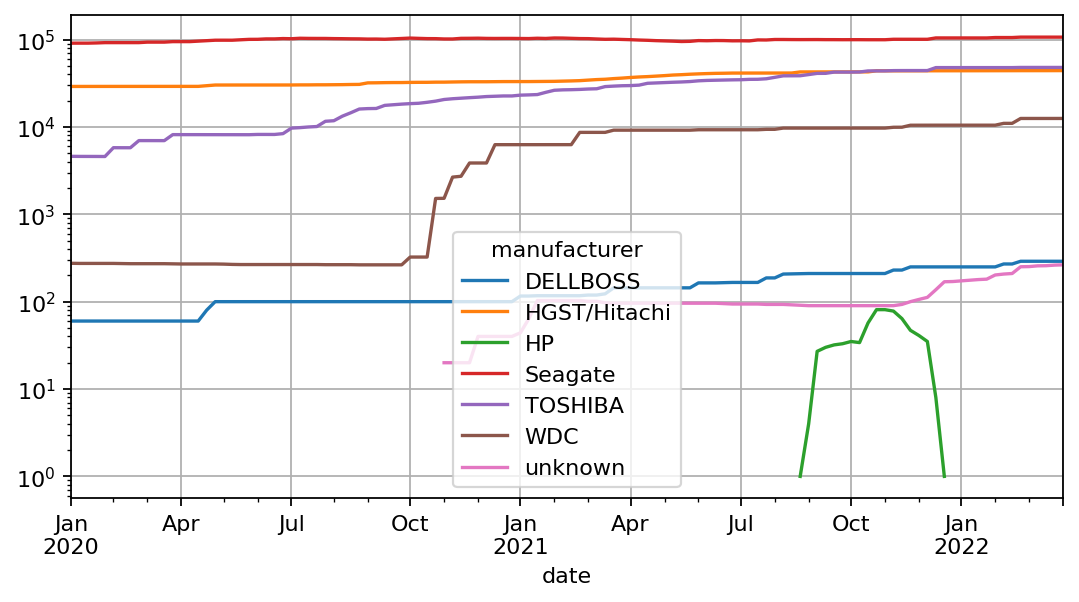

In [ ]:
pdp.plot(logy=True)

In [ ]:
dfsurv = spark.sql("""
select
    drive_spans.*,
    datediff(coalesce(failed_date, retired_date), launched_date) as duration,
    min(launched_date) over (partition by model) as model_introduced,
    percentile_approx(capacity_bytes, 0.5) over (partition by model order by capacity_bytes) as model_capacity
from drive_spans
""")

In [ ]:
dfsurv.limit(10).toPandas()

,manufacturer,model,serial_number,retired_date,launched_date,observed_days,capacity_bytes,failed_date,max_hours,failed_hours,failure,duration,model_introduced,model_capacity
0,DELLBOSS,DELLBOSS VD,7c238624703b0010,2022-09-30,2021-03-23,555,480036847616,None,NaN,NaN,0,556,2020-01-01,480036847616
1,DELLBOSS,DELLBOSS VD,d78f6cb9b2630010,2022-09-30,2021-06-02,485,480036847616,None,NaN,NaN,0,485,2020-01-01,480036847616
2,DELLBOSS,DELLBOSS VD,dd00c36064c80010,2022-09-30,2020-04-22,866,480036847616,None,NaN,NaN,0,891,2020-01-01,480036847616
3,DELLBOSS,DELLBOSS VD,600b0116420c0010,2022-09-30,2022-02-18,224,480036847616,None,NaN,NaN,0,224,2020-01-01,480036847616
4,DELLBOSS,DELLBOSS VD,55df2d0ab8940010,2022-09-30,2022-06-18,105,480036847616,None,NaN,NaN,0,104,2020-01-01,480036847616
5,DELLBOSS,DELLBOSS VD,3ace22ae8dcb0010,2022-09-30,2020-04-23,888,480036847616,None,NaN,NaN,0,890,2020-01-01,480036847616
6,DELLBOSS,DELLBOSS VD,5fb483cc7e370010,2022-09-30,2021-03-23,555,480036847616,None,NaN,NaN,0,556,2020-01-01,480036847616
7,DELLBOSS,DELLBOSS VD,d70dec0ff0770010,2022-09-30,2021-03-23,555,480036847616,None,NaN,NaN,0,556,2020-01-01,480036847616
8,DELLBOSS,DELLBOSS VD,3315af4f79260010,2022-09-30,2022-02-18,224,480036847616,None,NaN,NaN,0,224,2020-01-01,480036847616
9,DELLBOSS,DELLBOSS VD,8ef9d63c49ec0010,2022-09-30,2022-06-18,105,480036847616,None,NaN,NaN,0,104,2020-01-01,480036847616


In [ ]:
%%time

pdsurv = (
    dfsurv.select(
        "serial_number",
        "manufacturer",
        "model",
        "model_introduced",
        "model_capacity",
        "launched_date",
        "duration",
        "failure",
    )
    .toPandas()
    .assign(
        launched_date=lambda x: pd.to_datetime(x.launched_date),
        model_introduced=lambda x: pd.to_datetime(x.model_introduced),
    )
    .set_index("serial_number")
)

AttributeError: ignored

In [ ]:
pdsurv.head()

,manufacturer,model,model_introduced,model_capacity,launched_date,duration,failure
serial_number,,,,,,,
7c238624703b0010,DELLBOSS,DELLBOSS VD,2020-01-01,480036847616,2021-03-23,556,0
d78f6cb9b2630010,DELLBOSS,DELLBOSS VD,2020-01-01,480036847616,2021-06-02,485,0
dd00c36064c80010,DELLBOSS,DELLBOSS VD,2020-01-01,480036847616,2020-04-22,891,0
600b0116420c0010,DELLBOSS,DELLBOSS VD,2020-01-01,480036847616,2022-02-18,224,0
55df2d0ab8940010,DELLBOSS,DELLBOSS VD,2020-01-01,480036847616,2022-06-18,104,0


In [ ]:
YEARS = 365.25

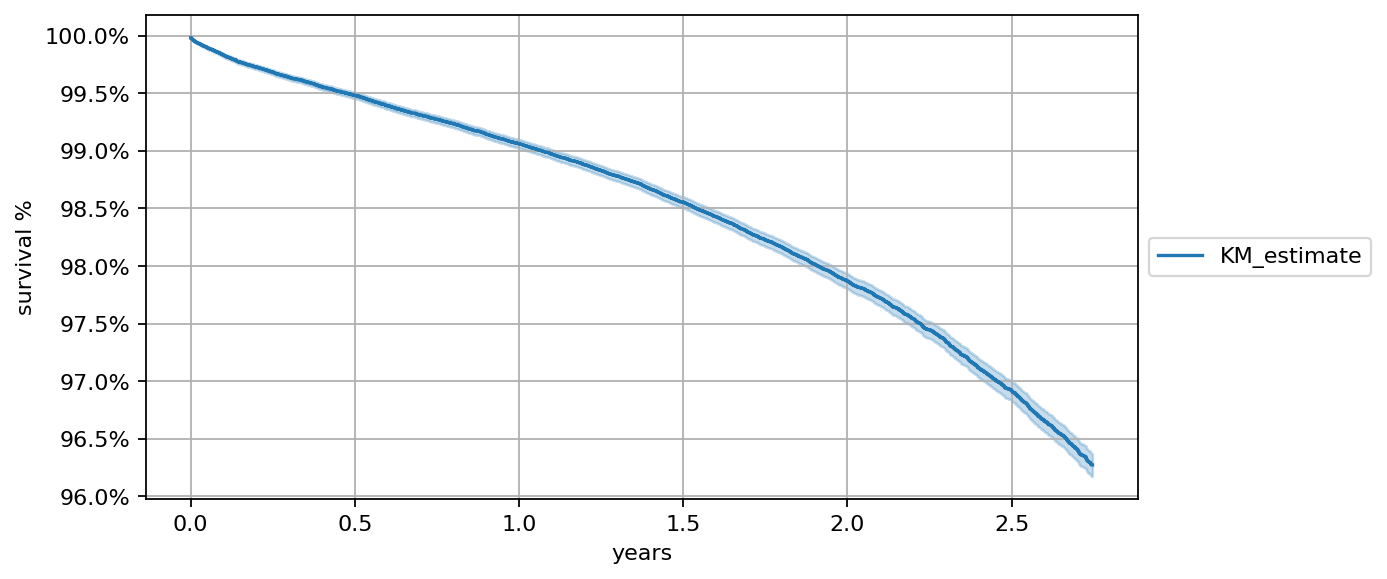

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(pdsurv.duration / YEARS, event_observed=pdsurv.failure)
ax = kmf.plot()

ax.set_xlabel("years")
ax.set_ylabel("survival %")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))

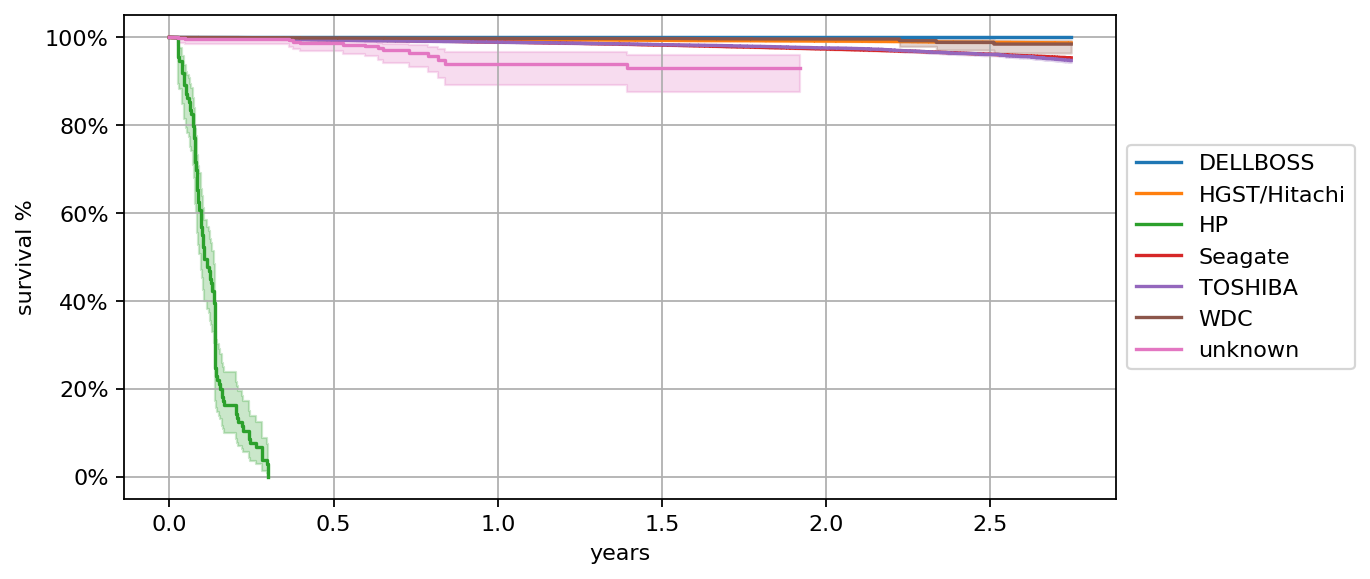

In [ ]:
ax = plt.gca()

for name, grouped_df in pdsurv.groupby("manufacturer"):

    if len(grouped_df) < 100:
        # skip small sample manufacturers
        continue

    kmf = KaplanMeierFitter()
    kmf.fit(grouped_df.duration / YEARS, grouped_df.failure, label=name)
    kmf.plot(ax=ax)

ax.set_xlabel("years")
ax.set_ylabel("survival %")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

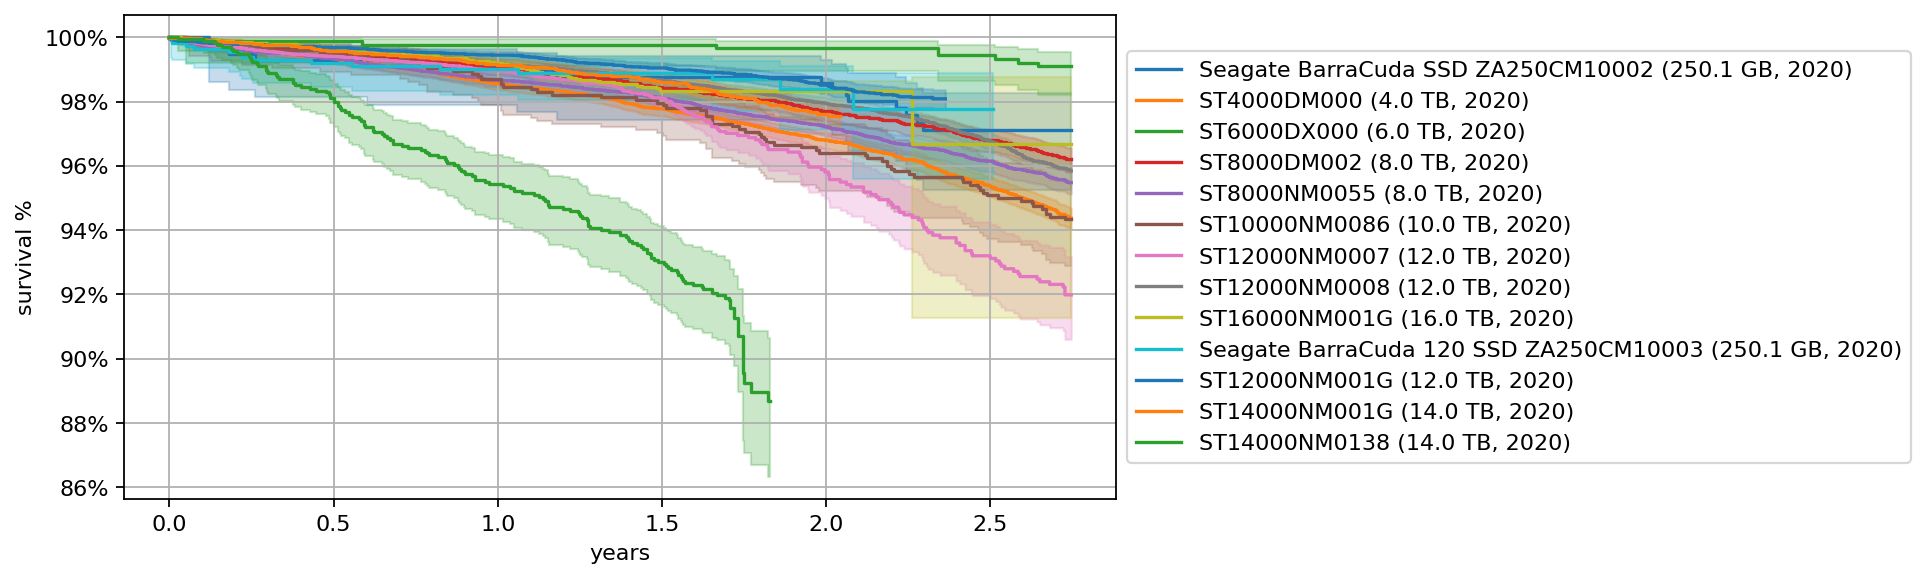

In [ ]:
ax = plt.gca()

mask = pdsurv.manufacturer == "Seagate"
gcols = ["model_introduced", "model_capacity", "model"]

for group, grouped_df in pdsurv[mask].groupby(gcols):

    model_introduced, model_capacity, model = group

    if len(grouped_df) < 500:
        # skip small sample groups
        continue

    label = "{} ({}, {})".format(
        model, naturalsize(model_capacity), model_introduced.year
    )

    kmf = KaplanMeierFitter()
    kmf.fit(grouped_df.duration / YEARS, grouped_df.failure, label=label)
    kmf.plot(ax=ax)

ax.set_xlabel("years")
ax.set_ylabel("survival %")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

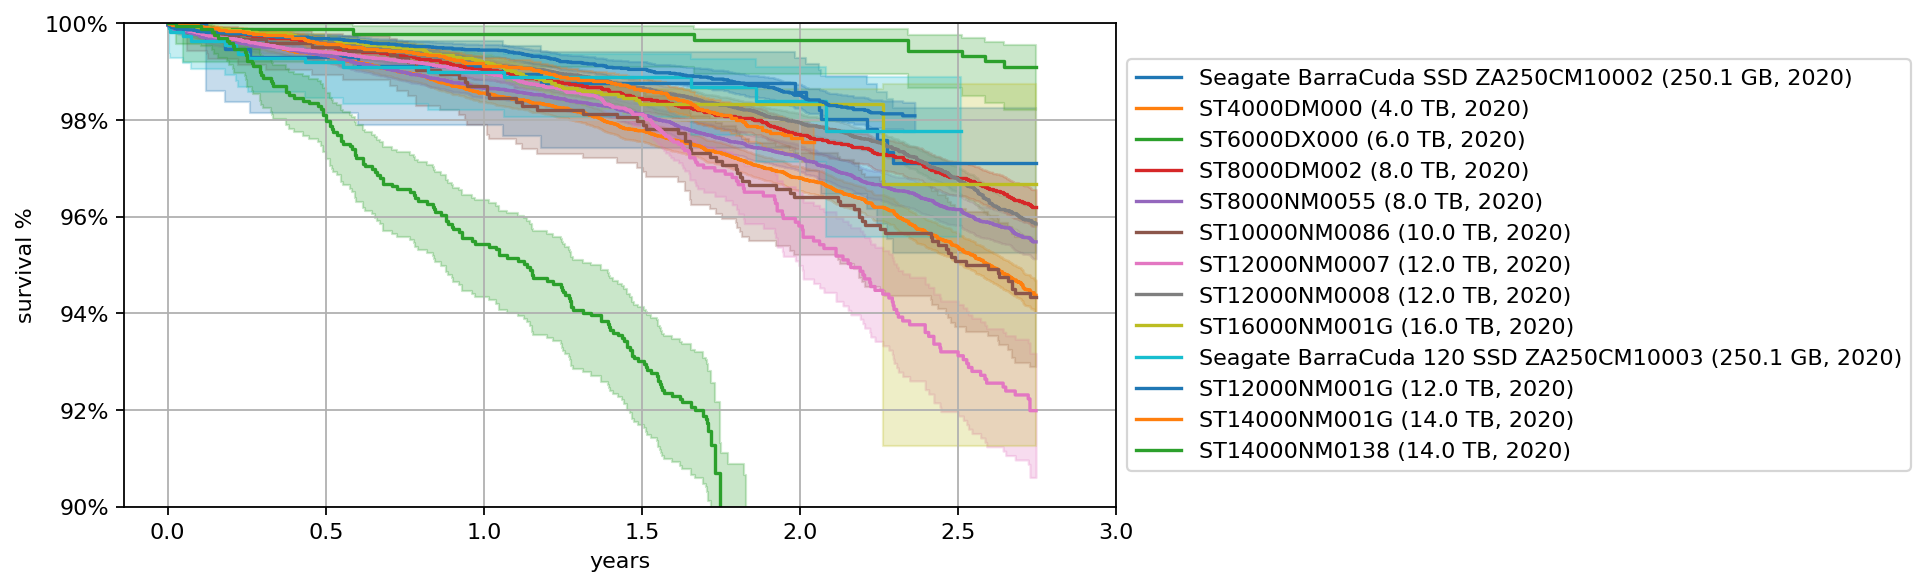

In [ ]:
ax.set_xlim(right=3)
ax.set_ylim(top=1, bottom=.9)
ax.figure

In [ ]:
dff.limit(10)

DataFrame[date: date, serial_number: string, model: string, capacity_bytes: bigint, failure: int, smart_9_raw: bigint, dataset: string]